In [148]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import math
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Basic statistical analyses
Modified from Strode PS, Brokaw A (2015). Using BioInteractive resources to teach mathematics and statistics in biology. HHMI, http://www.hhmi.org/biointeractive/teacher-guide-math-and-statistics

## Readings
McMillan Chapter 2

## Objectives
1. Summarize the location and spread of data using appropriate descriptive statistics.
2. Use the 95% confidence interval (CI) to test a hypothesis about differences in the mean response of treatment levels.

#### Background and Activity
In most biological experiments, scientists collect data on **samples** (subsets) of **populations**, and use these data to draw conclusions and test hypotheses about the entire population. 

For example, you may ask the following question : How does light intensity affect plant growth? You hypothesize that since light drives photosynthesis, light should increase plant growth, and predict that *Wisconsin Fast Plants* grown closer to a grow bulb will be taller than plants placed further away from the bulb. 

You test your hypothesis by growing seedlings at two different light levels, with eight replicates per light level. After three weeks your plants look like this:

![](plants.jpg)

#### Population vs Sample
Notice that your hypothesis addresses "plants". Not just the seeds you planted, not even just the species you're working with, but "plants". That idea of *all plants*, or maybe the idea of *all plants of this species* is referred to as the **population**. 

You did not test the population. That would have meant that you grew every single seed of this species, or all seeds of all species, under these conditions. Obviously, that would be impossible. Instead, you tested a **sample**. 

Now we have a conundrum. You tested a sample, but want to say something about the population. **This** is where statistics can help.

#### How do you interpret your results?  

Let's say you measure you plants and get the data below.

In [5]:
mydata = pd.read_csv('sample_stats.csv')
mydata

,treatment,replicate,height
0,low,A,4.1
1,low,B,3.2
2,low,C,3.8
3,low,D,3.7
4,low,E,4.6
5,low,F,3.9
6,low,G,3.9
7,low,H,4.7
8,high,A,3.9
9,high,B,4.7


How can you use these data to evaluate your hypothesis? We start with **descriptive statistics** to compare the data.

First, just look at the data and the pictures. What do you see? Is one treatment higher or lower? How do you know? How can you boil all of those numbers down to make the comparison easier? How can you test your prediction that the high light treatment would be taller than the low light treatment?

Work in your group on your computers to do what you think is necessary to evaluate your hypothesis.  Are you examining the **sample** or the **population**?

### Measures of average (central tendency):  
You have eight replicates for each treatment. What would happen if you had 100 or 1,000 replicates each? What about if you tried growing **all** the plants (the *population*) at each treatment? The data above are just a *sample* of all the plants that have ever and will ever be grown in those conditions. We can assume, however, that they are somewhat representative of the population, and therefore the "center" of your samples will be close to the "center" or average of the population. So what is the center?

The most common calculation of the center is the **mean**. Your hypothesis and question is about **all** the plants, so what we want to understand is the mean of the entire population, which is called $\mu$.  But we didn't measure all the plants, just a sample, so we calculate our sample means as $\bar{x}$:

$$ \bar{x} = \frac{\sum{x}}{N} $$  

+ $\sum{x}$ is "the sum of all the values"
+ $N$ is the number of samples in the calculation.
+ the mean is the sum of all of the values for that sample divided by the number of replicates

**Calculate the mean for the whole group, and for each treatment.**

In [129]:
sample_mean = mydata['height'].mean()
print('whole sample mean = {:.1f}'.format(sample_mean))

#get just the low and high treatements
lows = mydata.loc[mydata['treatment']=='low','height']
highs = mydata.loc[mydata['treatment']=='high', 'height']

#use the pandas describe function to get the basic descriptions
lowsd = lows.describe()
highsd = highs.describe()

#get the means
#low_mean = lows.mean()
#high_mean = highs.mean()
print('low treatment mean = {:.1f}'.format(lowsd['mean']))
print('high treatment mean = {:.1f}'.format(highsd['mean']))

whole sample mean = 4.3
low treatment mean = 4.0
high treatment mean = 4.6


Is one mean higher than the other? Does that mean that the groups are significantly different? Can you support or reject the hypothesis? What about the fact that the shortest plant in the HIGH treatment is shorter than the tallest plant in the LOW treatment? If they didn't overlap, would the means be different?

To really judge the differences between groups, we need to look at the differences **within** groups.

### Measures of variability around the center:  
As you can see in the data, not all the plants in each treatment are the same.  There is a lot of variability among organsims. Some could be due to differences in replicates (maybe you buried one seed deeper than another, or one corner was colder than another), or due to natural variation (genetic differences). 

You can think about the variation **within** the treatment group as the variation or differences among all of the plants in either the low or high treatment. 

The simplest measure of variability is the **range**, which is the difference between the largest and smallest values. Use the data above to find the minimum and maximum of each treatment, and then the range of each. A larger range indicates a greater spread of the data, but is easily thrown off by a single value. What would happen if just one of your seeds, like low A, happened to get a late start because it was buried too deeply and was only 1 cm tall? What would the range be then? Is that a good measure of true variability?

In [49]:
print('low treatment range = {} to {}'.format(lowsd['min'], lowsd['max']))
print('high treatment range = {} to {}'.format(highsd['min'], highsd['max']))

low treatment range = 3.2 to 4.7
high treatment range = 3.7 to 5.1


Look at the minimums and maximums of each treatment. Since the tallest single plant was in the **high** treatment, what does that tell you? Does that mean that the **high** treatment plants are all taller in your sample? Does that mean that if you worked with the **population** that the **high** treatment would be taller?  Really, it doesn't tell you too much.

A measure of *variability* is trying to measure how spread out the data are, or how far each measurement is from the mean - the *deviation from the mean*. You can also calculate the mean deviation, the mean difference between each data point and the mean. That's the **standard deviation**. For each data point above, calculate the difference between that point and the mean. Now calculate the mean difference. What do you find?

In [67]:
lowsdevs = lows - lowsd['mean']
highsdevs = highs - highsd['mean']
print('low treatment deviations = {}'.format(lowsdevs.values))
print('mean of deviations = {0:.1f}'.format(lowsdevs.mean()))
print('high treatment deviations = {}'.format(highsdevs.values))
print('mean of deviations = {0:.1f}'.format(highsdevs.mean()))

low treatment deviations = [ 0.1125 -0.7875 -0.1875 -0.2875  0.6125 -0.0875 -0.0875  0.7125]
mean of deviations = -0.00
high treatment deviations = [-0.7  0.1  0.5  0.2 -0.9  0.   0.5  0.3]
mean of deviations = 0.00


That's a good simple way to *think* of the standard deviation, but it doesn't quite work. Why not? Some of your differences are negative and some are positive, so they average out to zero. The actual equation for the **standard deviation** takes care of that problem:

$$ s = \sqrt{\frac{\sum{(x_i - \bar{x})^2}}{N-1}} $$

The top of the fraction is the sum of the squares of the differences, and the bottom is the sample size (minus 1). Taking a square root of the whole thing kind of takes care of squaring the differences. Calculate the standard deviation for each treatment level for our sample data.

In [127]:
print('low treatment mean ± std = {:.1f} ± {:.1f}'.format(lowsd['mean'], lowsd['std']))
print('high treatment mean ± std = {:.1f} ± {:.1f}'.format(highsd['mean'], highsd['std']))
print('low: {:.1f} to {:.1f}'.format(lowsd['mean']-lowsd['std'],lowsd['mean']+lowsd['std']))
print('high: {:.1f} to {:.1f}'.format(highsd['mean']-highsd['std'],highsd['mean']+highsd['std']))

low treatment mean ± std = 4.0 ± 0.5
high treatment mean ± std = 4.6 ± 0.5
low: 3.5 to 4.5
high: 4.1 to 5.1


How does this help us? In a data set with a large number of measurements (more than the 8 above) that are normally distributed (a bell curve), 68.3%  of the measurements are expected to fall within 1 standard deviation of the mean, and 95% should fall within 2 standard deviations of the mean. In the figure below, $\sigma$ stands for standard deviation. Add up the percentages from $-2\sigma$ to $2\sigma$ and you get about 95%.

![](Standard_deviation_diagram.png)

Let's assume a couple of things:
  + your sample mean is kind of close to the population mean if you had done the experiment on **all** of the plants
  + your sample standard deviation is close to the actual population standard deviation

If those things are true, you may assume that if you reran the test with hundreds or thousands of seeds, that 65% of the low intensity treatment plants would fall within one standard deviation of the mean you found, or 4.0 ± 0.5 cm. The ± tells you to both add and subtract, which leaves with 3.5 to 4.5 cm as your range. For the high treatment (4.6 ± 0.5), the range would be 4.1 to 5.1 cm.

But your calculated sample mean is not necessarily close to the population mean - if you grew eight more plants under the same conditions, you might find a different sample mean. But if you grew 50 plants under those conditions, you can be confident that your sample mean is probably *closer* to the population mean. In other words, the difference between your mean and the population mean is related to the number of samples you collected - your sample gets closer to the population as your sample size increases. To estimate this we use the **standard error of the mean** (SE). Calculating it after the standard deviation is quite easy:

$$ SE = \frac{stdev}{\sqrt{N}} $$

That basically lets us estimate how far away our sample mean is from the population mean. 

Notice that *SE* increases if:
  + our standard deviation is high (we have lots of variation)
  + our sample size is small. 
  + in either case, those things indicate that our sample mean is likely very different from the actual population mean.
  
Now calculate the SE for each treatment level for our sample data.

In [124]:
lowSE = lowsd['std']/math.sqrt(lowsd['count'])
highSE = highsd['std']/math.sqrt(highsd['count'])
print('low treatement standard error = {:.1f}'.format(lowSE))
print('high treatement standard error = {:.1f}'.format(highSE))

low treatement standard error = 0.2
high treatement standard error = 0.2


That still doesn't really help us evaluate our hypothesis, though, it just tells us something about our data.  However, it does lead us to our last measurement of variability, which is the **95% confidence interval** ( $CI_{95\%}$ or 95CI). This says that given our sample mean ($\bar{x}$) and our sample's standard error (SE), the actual population mean ($\mu$) has a 95% change of being contained within the range described by  $\bar{x} \pm CI_{95\%}$, where $CI_{95\%}$ is simply:

$$ SE * 1.96 $$
 
Notice that 1.96 is almost 2, and with standard deviations 95% of the samples were expected fall within ±2 standard deviations of our sample mean. That's where the 1.96 basically comes from.

But we still haven't figured out if our treatments led to different results! The range, standard deviation, standard errors, and confidence intervals are all measurements of variability **within** treatments (i.e. how big are the differences among all of the *low* treatment plants), but our prediction makes a statment about differences (or variability) **among** treatments (i.e. differences between low and high treatment plants). Make a simple plot of the data above. Do you plot each point or means? How about variation? Do the data overlap? Is that significant? Are the means different? Is that difference significant?

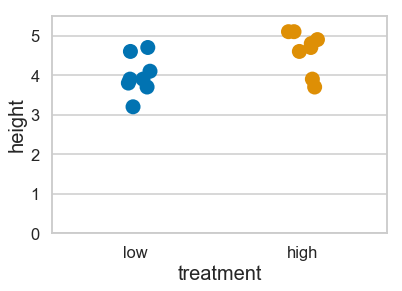

In [132]:

# Make the plot, 's' value is the 'scale' of the markers
sns.set(style='whitegrid', context='talk', rc={"axes.labelsize":20}, palette = 'colorblind')

fig=sns.stripplot(data = mydata, x = 'treatment', y = 'height', s=15);

# Set things like axis labels
fig.set(
    ylim= [0,5.5]
    )

# Show the plot
plt.show(fig)

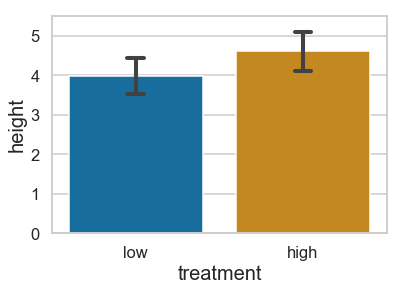

In [136]:
# Make a plot with standard deviations
fig=sns.barplot(data = mydata, x = 'treatment', y = 'height', ci = 'sd', capsize = 0.1);

# Set things like axis labels
fig.set(
    ylim= [0,5.5]
    )

# Show the plot
plt.show(fig)

We need to see if the variation **among** groups (like the differences in means), is *larger* than the variation **within** each group (like the standard deviation, or the $CI_{95\%}$. 

One of the easiest ways of testing significance is using the 95% confidence intervals. If they intervals overlap, that means that there is a chance that the actual population means are the same (or even reversed). If the do not overlap, then we can say that we are 95% confident that the actual population means are different, and that, statistically, is pretty good. However, note that we cannot say that we are absolutely certain that the two means are different, we can only say that it is unlikely that they are not different.

Calculate the $CI_{95\%}$ for each treatment. Now make a quick plot of the mean for each group with error bars showing the $CI_{95\%}$. Can you support or reject the hypothesis? Why?

low treatment mean ± 95CI = 4.0 ± 0.3
high treatment mean ± 95CI = 4.6 ± 0.4
low treatment confidence limits are from 3.7 to 4.3
high treatment confidence limits are from 4.2 to 5.0


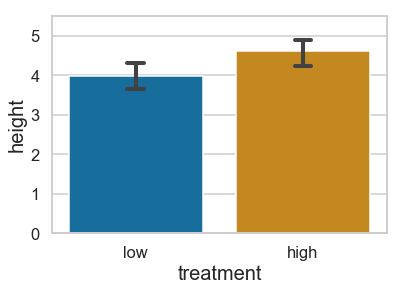

In [149]:
lowmean = lowsd['mean']
highmean = highsd['mean']
lowCI = lowSE*1.96
highCI = highSE*1.96
print('low treatment mean ± 95CI = {:.1f} ± {:.1f}'.format(lowmean, lowCI))
print('high treatment mean ± 95CI = {:.1f} ± {:.1f}'.format(highmean, highCI))
print('low treatment confidence limits are from {:.1f} to {:.1f}'.format(lowmean-lowCI,lowmean+lowCI))
print('high treatment confidence limits are from {:.1f} to {:.1f}'.format(highmean-highCI,highmean+highCI))
# Make a plot with CI95
fig=sns.barplot(data = mydata, x = 'treatment', y = 'height', ci = 95,capsize = 0.1);

# Set things like axis labels
fig.set(
    ylim= [0,5.5]
    )

# Show the plot
plt.show(fig)

## Conclusions
So, what do we have? 
+ We can say that we are 95% confident that if we were to sample all of the plants (of this species), the population mean for the low treatement would be between 3.7 and 4.3 cm.
+ We can say that we are 95% confident that if we were to sample all of the plants (of this species), the population mean for the high treatement would be between 4.2 and 5.0 cm.

95% is kind of a magic number in science. Actually its complement, 5%, is the magic number.

At what point do we say that two populations would be different based on our samples? When we can say that **there is less than a 5% chance that our estimated population means are the same**. We often see that 5% value as a **p-value**, and say that if *p* is less than 5% (p < 0.05) our samples indicate that the populations under these treatements would be different.

So, since we say that we are 95% confident that our low treatement mean could be up to 4.3 cm and that our high treatment mean could be down to 4.2, we are 95% confident that the low and high means could overlap. Or, we are **not** less than 5% confident that the means are the same. 

In other words, despite the fact that the bars look like they are different heights, because the 95% confidence intervals do overlap, we can **not** say that the bars are different, our data do not follow our prediction, and therefore we **reject our hypothesis**.